
# Imports


In [ ]:
import os
import cv2
from google.colab import drive
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np
import json
from typing import Optional, Tuple
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Labels Visualizations

In [ ]:
def read_files(path:str)->pd.DataFrame:
  if not os.path.exists(path):
    raise FileNotFoundError(f"File not found: {path}")
  with open(path, 'r') as file:
    json_data = json.load(file)
    json_data_str_keys = {str(key): value for key, value in json_data.items()}

  df = pd.DataFrame.from_dict(json_data_str_keys)
  return df

In [ ]:
def draw_bounding_boxes(image: np.ndarray, line_labels: Optional[pd.DataFrame]=None, true_word_labels: Optional[pd.DataFrame]=None,
                pred_word_labels: Optional[pd.DataFrame]=None, fill: bool = False) -> np.ndarray:
  thickness = -1 if fill else 2
  for labels, color in zip([line_labels, true_word_labels, pred_word_labels], [(255, 0, 0), (0, 255, 0), (0, 0, 255)]):
    if labels is not None:
      for row in labels:
        image = cv2.rectangle(image, row[:2], row[2:], color, thickness)
  return image

True Labels:


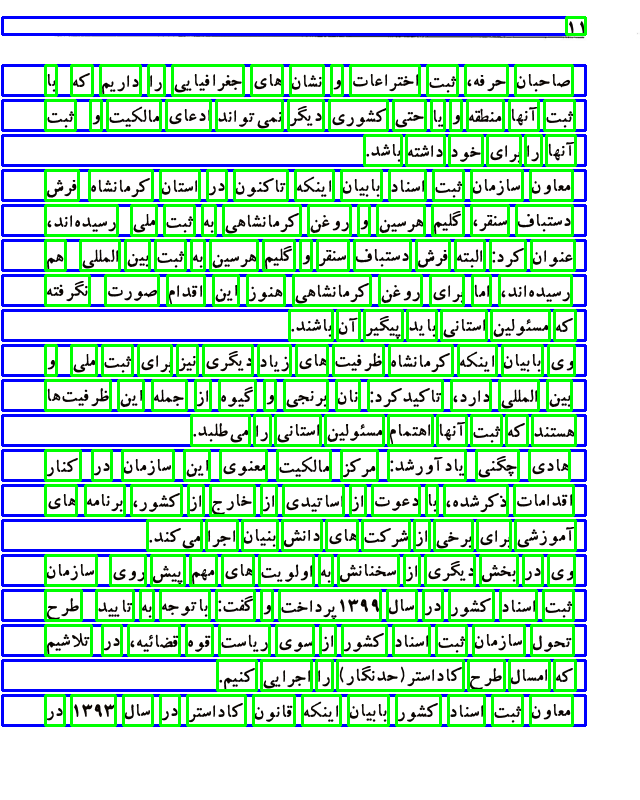

Baseline Solution:


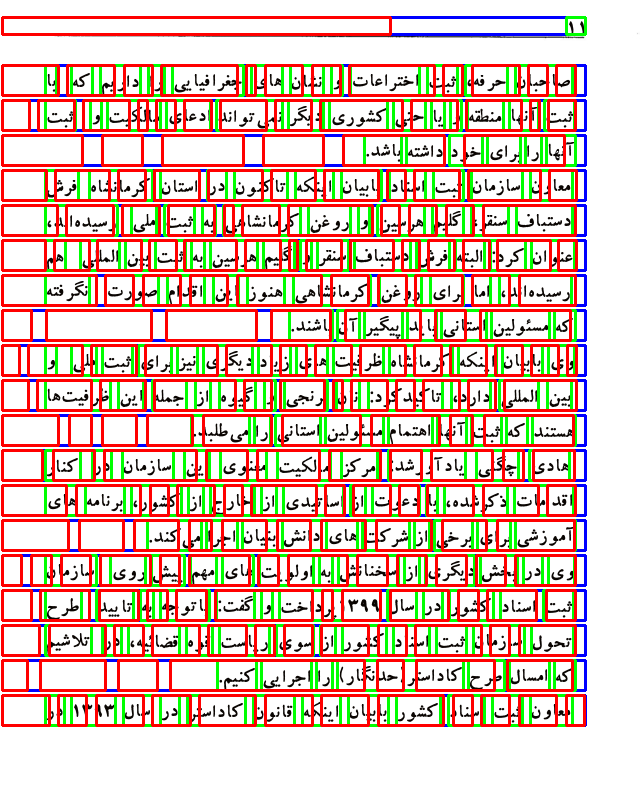

In [ ]:
path = "/content/drive/MyDrive/Army/אלונים/האקטון 2024/hackaton_data"
images_path = os.path.join(path, "images")
line_labels_path =  os.path.join(path, "line_labels.json")
word_labels_path =  os.path.join(path, "word_labels.json")
pred_word_labels_path =  os.path.join(path, "naive_solution_pred.json")

line_labels = read_files(line_labels_path)
true_word_labels = read_files(word_labels_path)
pred_word_labels = read_files(pred_word_labels_path)

for image in os.listdir(images_path):
  image_name = image.split(".")[0].split("_")[1]
  image_path =  os.path.join(images_path, image)

  image = cv2.imread(image_path)
  line_bbox = np.array(line_labels[image_name]["BoundingBoxes"])
  true_word_bbox = np.array(true_word_labels[image_name]["BoundingBoxes"])
  pred_word_bbox = np.array(pred_word_labels[image_name]["BoundingBoxes"])

  print("True Labels:")
  bbox_image = draw_bounding_boxes(image,line_bbox , true_word_bbox)
  cv2_imshow(bbox_image)
  print("Baseline Solution:")
  bbox_image = draw_bounding_boxes(image,line_bbox , true_word_bbox, pred_word_bbox)
  cv2_imshow(bbox_image)
  break

# Classic CV

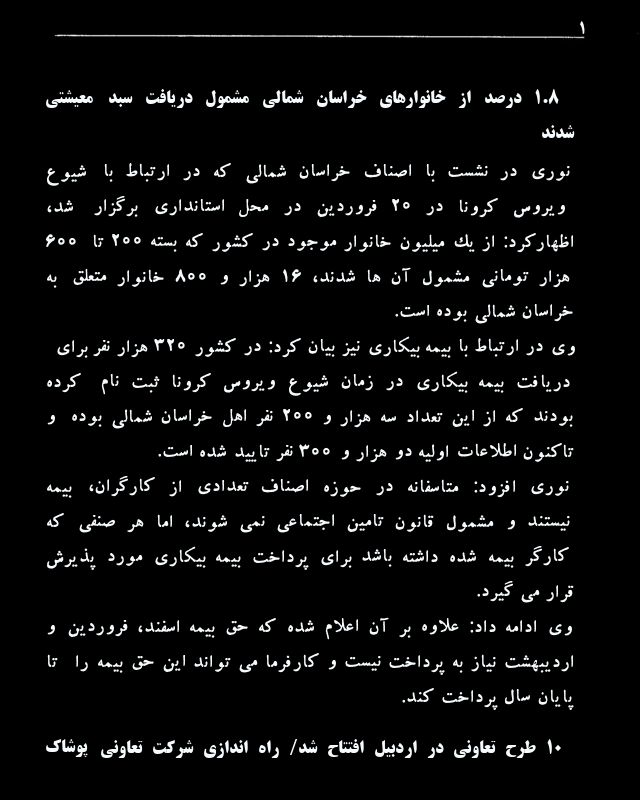

In [ ]:
image_path = "/content/drive/MyDrive/Army/אלונים/האקטון 2024/hackaton_data/images/page_00001.png"
image = cv2.imread(image_path)
# change black and white to white and black
image = cv2.bitwise_not(image)
cv2_imshow(image)

## Hough Lines

Hough Lines is a computer vision technique used to detect straight lines in an image. It transforms points in the image space to a parameter space (Hough space), where lines are represented as intersections or peaks. By identifying these peaks, the algorithm determines the presence of lines in the original image.







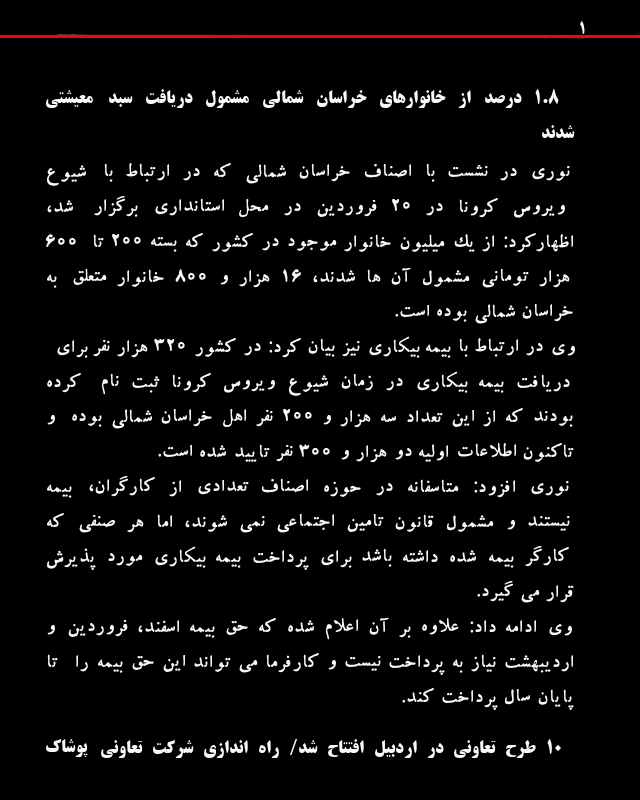

In [ ]:
def compute_and_visualize_hough_lines(image: np.ndarray) -> np.ndarray:
  image = image.copy()
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  edges = cv2.Canny(gray, 50, 150, apertureSize=3)
  lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
  if lines is not None:
    for rho, theta in lines[0]:
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a * rho
      y0 = b * rho
      x1 = int(x0 + 1000 * (-b))
      y1 = int(y0 + 1000 * (a))
      x2 = int(x0 - 1000 * (-b))
      y2 = int(y0 - 1000 * (a))
      cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
  return image
hough_lines_image= compute_and_visualize_hough_lines(image)
cv2_imshow(hough_lines_image)


## Harris Corners
Harris Corner is a feature detection algorithm used to identify corners or interest points in an image. It works by analyzing the local changes in intensity in all directions around a pixel. If significant changes occur in multiple directions, the point is classified as a corner.

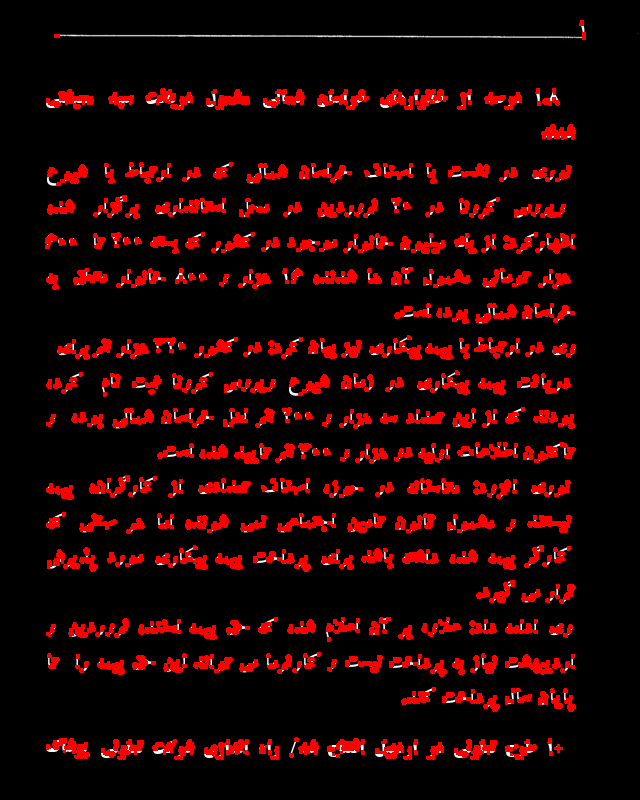

In [ ]:
def find_and_visualize_corners(image: np.ndarray) ->np.ndarray:
  image = image.copy()
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray = np.float32(gray)
  dst = cv2.cornerHarris(gray, 2, 3, 0.04)
  dst = cv2.dilate(dst, None)
  image[dst > 0.01 * dst.max()] = [0, 0, 255]
  return image

corner_image = find_and_visualize_corners(image)
cv2_imshow(corner_image)

## Erosion and Dilation
Erosion and Dilation are basic image processing operations used in morphological transformations.

* Erosion: This operation reduces the size of objects in a binary image by eroding away the boundaries of regions. It removes pixels on the object's edges, making objects smaller and eliminating small noise.

* Dilation: This operation enlarges objects in a binary image by adding pixels to the boundaries of regions. It increases the size of objects, filling in small gaps or holes.

Both are commonly used for cleaning up or altering the shapes of objects in an image.

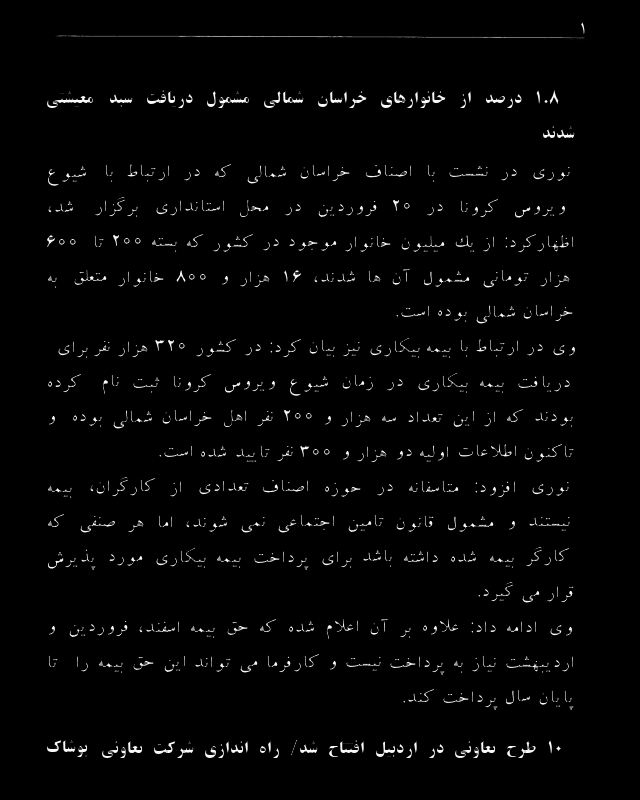

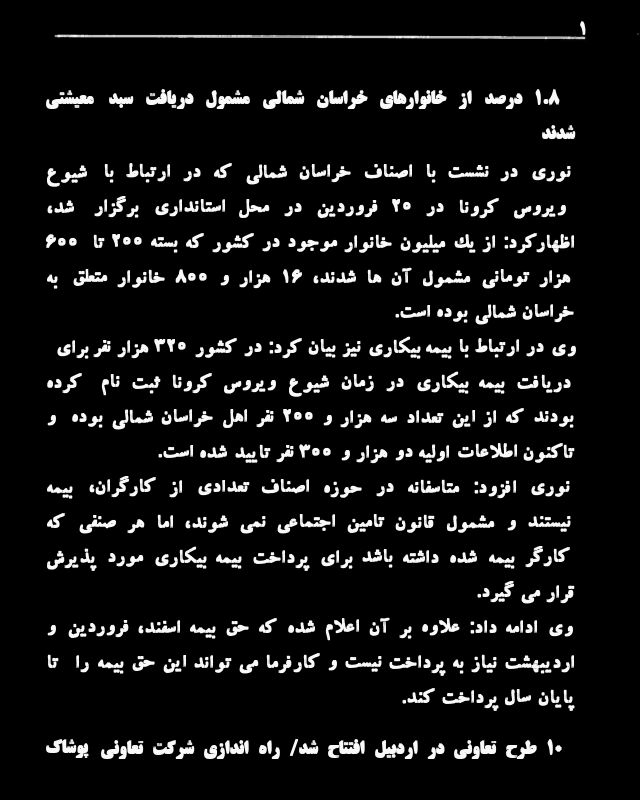

In [ ]:
def compute_and_visualize_erosion_and_dilation(image: np.ndarray, kernel_size:Tuple[int,int] = (2,2)) -> Tuple[np.ndarray, np.ndarray]:
  image = image.copy()
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  kernel = np.ones(kernel_size, np.uint8)
  erosion = cv2.erode(gray, kernel, iterations=1)
  dilation = cv2.dilate(gray, kernel, iterations=1)
  return erosion, dilation

erosion, dilation = compute_and_visualize_erosion_and_dilation(image)

cv2_imshow(erosion)
cv2_imshow(dilation)

## BBoxes examples

Original Image:


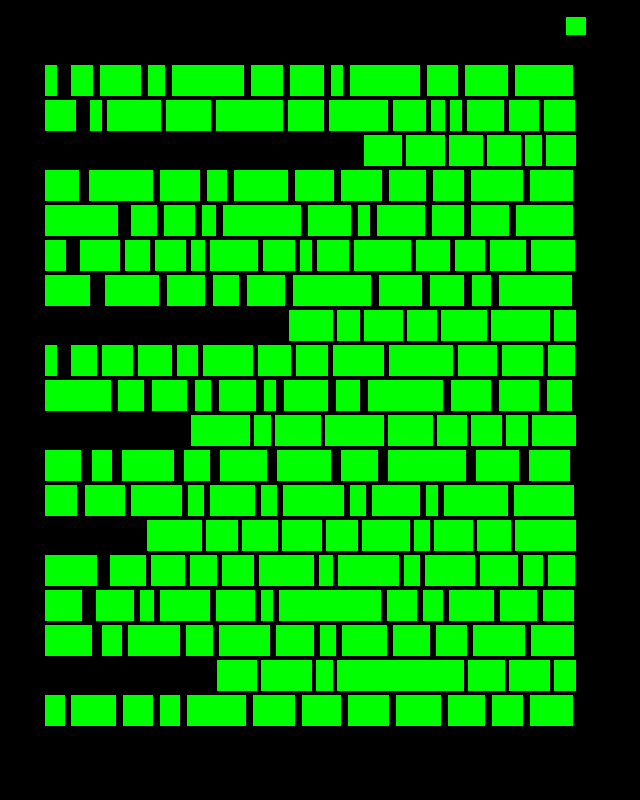

Eroded Image:


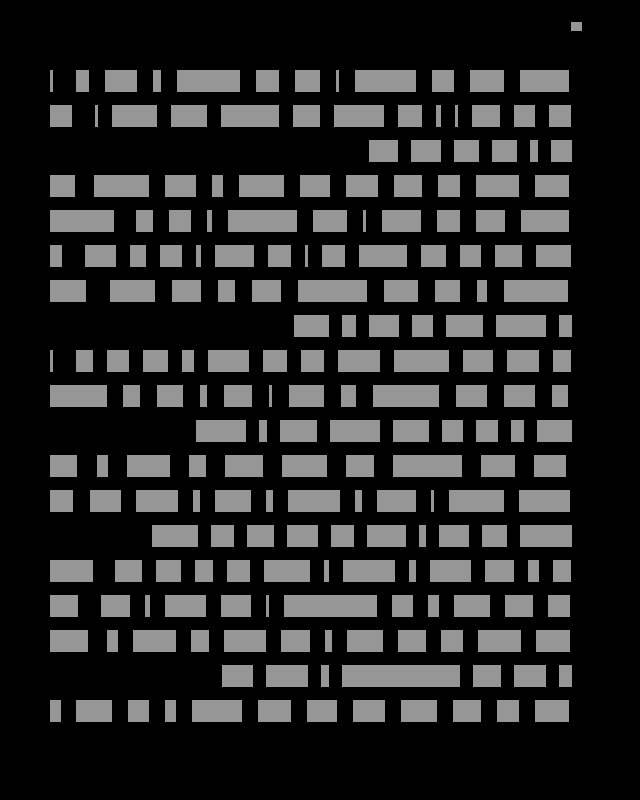

Dilated Image:


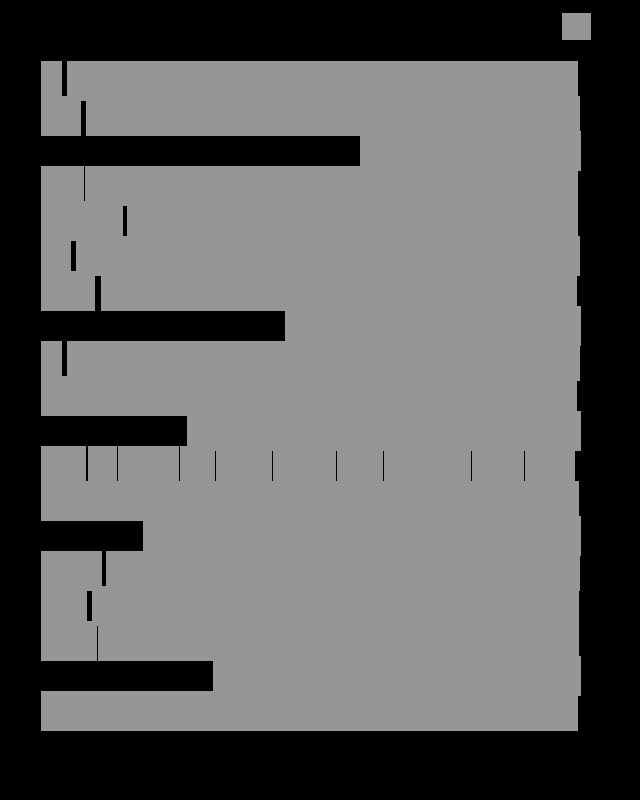

In [ ]:
path = "/content/drive/MyDrive/Army/אלונים/האקטון 2024/hackaton_data"
images_path = os.path.join(path, "images")
line_labels_path =  os.path.join(path, "line_labels.json")
word_labels_path =  os.path.join(path, "word_labels.json")
pred_word_labels_path =  os.path.join(path, "naive_solution_pred.json")

line_labels = read_files(line_labels_path)
true_word_labels = read_files(word_labels_path)
pred_word_labels = read_files(pred_word_labels_path)

for image in os.listdir(images_path):
  image_name = image.split(".")[0].split("_")[1]
  image_path =  os.path.join(images_path, image)

  image = np.zeros_like(cv2.imread(image_path))
  line_bbox = np.array(line_labels[image_name]["BoundingBoxes"])
  true_word_bbox = np.array(true_word_labels[image_name]["BoundingBoxes"])
  pred_word_bbox = np.array(pred_word_labels[image_name]["BoundingBoxes"])

  bbox_image = draw_bounding_boxes(image, true_word_labels=true_word_bbox, fill=True)
  print("Original Image:")
  cv2_imshow(bbox_image)
  erosion_image, dilation_image = compute_and_visualize_erosion_and_dilation(image, kernel_size=(10,10))
  print("Eroded Image:")
  cv2_imshow(erosion_image)
  print("Dilated Image:")
  cv2_imshow(dilation_image)
  break

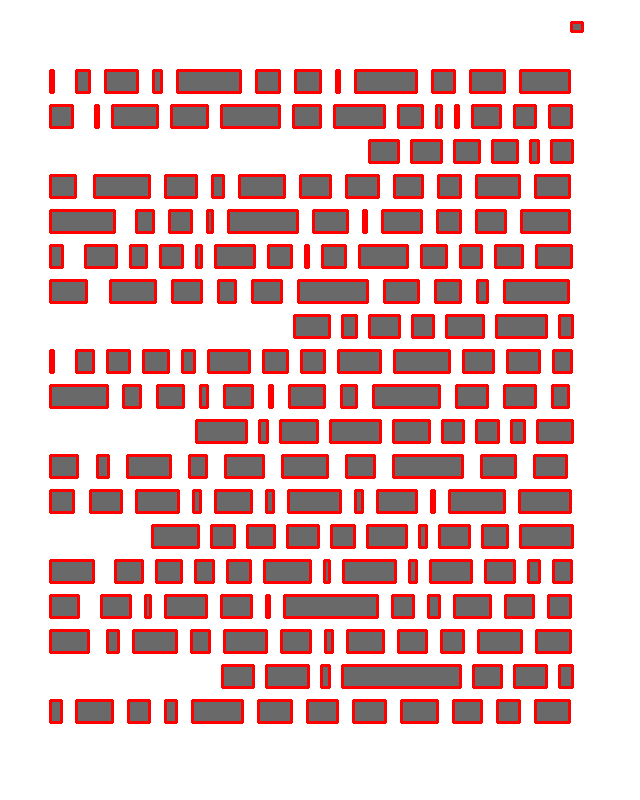

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
gray_image = cv2.bitwise_not(erosion_image)

# Apply adaptive thresholding for better block detection
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Detect contours
contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes on the image
bounding_box_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_box_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

cv2_imshow(bounding_box_image)

## Template Matching
Template Matching is a technique in computer vision used to find a specific pattern or object in an image by comparing it to a predefined template. The process involves sliding the template over the input image and calculating a similarity score at each location, often using methods like cross-correlation or mean squared error. The position where the similarity score is highest indicates the best match for the template in the image.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


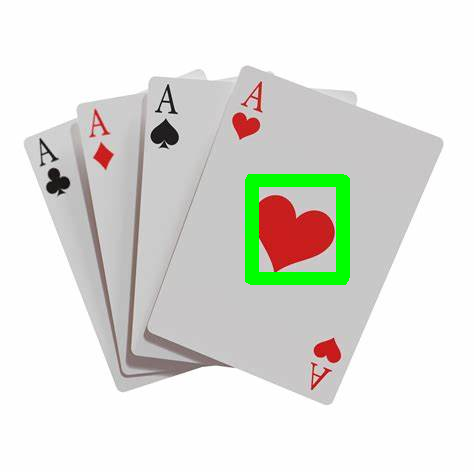

In [ ]:
def template_matching(main_image_path, template_image_path, threshold=0.8):
    # Load the main image and the template image
    main_image = cv2.imread(main_image_path)
    template = cv2.imread(template_image_path)

    # Convert images to grayscale
    main_gray = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    # Get the dimensions of the template
    w, h = template_gray.shape[::-1]

    # Perform template matching using cv2.matchTemplate
    result = cv2.matchTemplate(main_gray, template_gray, cv2.TM_CCOEFF_NORMED)

    # Find locations where the match is above the threshold
    locations = np.where(result >= threshold)

    # Draw rectangles around the matched regions
    for pt in zip(*locations[::-1]):
        cv2.rectangle(main_image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

    # Show the final result
    cv2_imshow(main_image)

# Example usage:
template_matching('/content/drive/MyDrive/Army/אלונים/האקטון 2024/cards.jpeg', '/content/drive/MyDrive/Army/אלונים/האקטון 2024/shape.png', threshold=0.8)


# Utils

## Non Max Suppression
Non-Maximum Suppression (NMS) is a technique used in computer vision to refine and filter out redundant or overlapping results, typically in object detection and edge detection tasks. It works by selecting the strongest response (e.g., highest confidence score or intensity) in a region and suppressing or discarding weaker, non-maximum responses nearby. This ensures that only the most prominent features or bounding boxes are retained, improving accuracy and reducing noise in the results.

In [ ]:
import numpy as np

def non_max_suppression(boxes, scores, iou_threshold):
    """
    Perform Non-Maximum Suppression (NMS) on the bounding boxes.

    :param boxes: A list of bounding boxes in the format [x1, y1, x2, y2].
    :param scores: A list of confidence scores corresponding to the boxes.
    :param iou_threshold: IOU threshold for suppression.
    :return: Indices of boxes to keep after suppression.
    """

    if len(boxes) == 0:
        return []

    # Convert boxes to numpy array
    boxes = np.array(boxes)
    scores = np.array(scores)

    # Compute the area of the bounding boxes
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    areas = (x2 - x1 + 1) * (y2 - y1 + 1)

    # Sort by score (higher scores first)
    sorted_indices = np.argsort(scores)[::-1]

    keep = []

    while len(sorted_indices) > 0:
        # Get the index of the highest score box
        current = sorted_indices[0]
        keep.append(current)

        # Compute the intersection areas
        xx1 = np.maximum(x1[current], x1[sorted_indices[1:]])
        yy1 = np.maximum(y1[current], y1[sorted_indices[1:]])
        xx2 = np.minimum(x2[current], x2[sorted_indices[1:]])
        yy2 = np.minimum(y2[current], y2[sorted_indices[1:]])

        # Compute the width and height of the intersection box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # Compute the Intersection over Union (IoU)
        intersection = w * h
        iou = intersection / (areas[current] + areas[sorted_indices[1:]] - intersection)

        # Keep boxes with IoU less than the threshold
        remaining_indices = np.where(iou < iou_threshold)[0]
        sorted_indices = sorted_indices[remaining_indices + 1]

    return keep


# Parsing OpenSource OCR Results

In [ ]:
from pathlib import Path
DATA_PATH = Path(os.getcwd()).parent / 'Data'

In [ ]:
# This code was the code used to parse tesseract.
# Note that the original tesseract results contain more information than the information accessed in this script
pytesseract_path_full_page = DATA_PATH / "opensource_results/tesseract/predicted_on_full_page/test_tesseract_results.json"
pytesseract_path_line_level = DATA_PATH / "opensource_results/tesseract/predicted_on_full_page/test_tesseract_line_results.json"

def parse_tesseract_full_page(pytesseract_path):
    results = {}
    with open(pytesseract_path, 'r') as f:
        pytesseract_original = json.load(f)

    for image_name in pytesseract_original.keys():
        key = image_name.split('_')[1].split('.')[0]
        boxes = []
        texts = []
        for i in range(len(pytesseract_original[image_name]["left"])):
            confidence = pytesseract_original[image_name]["conf"][i]
            if confidence != -1:
                left = pytesseract_original[image_name]["left"][i]
                top = pytesseract_original[image_name]["top"][i]
                width = pytesseract_original[image_name]["width"][i]
                height = pytesseract_original[image_name]["height"][i]
                right = left + width
                bottom = top + height
                bbox = (left, top, right, bottom)
                text = pytesseract_original[image_name]["text"][i]
                boxes.append(bbox)
                texts.append(text)
        results[key] = {"BoundingBoxes": boxes, "Texts": texts}
    return results

def parse_tesseract_line_level(pytesseract_line_path):
    results = {}
    with open(pytesseract_line_path, 'r') as f:
        pytesseract_original = json.load(f)

    for image_name in pytesseract_original.keys():
        key = image_name.split('_')[1].split('.')[0]
        boxes = []
        texts = []
        for line_index in range(len(pytesseract_original[image_name])):
            line_box = pytesseract_original[image_name][line_index]["BoundingBox"]
            for i in range(len(pytesseract_original[image_name][line_index]["OCRResults"]["left"])):
                confidence = pytesseract_original[image_name][line_index]["OCRResults"]["conf"][i]

                if confidence != -1:
                    left = line_box[0] + pytesseract_original[image_name][line_index]["OCRResults"]["left"][i]
                    top = line_box[1] + pytesseract_original[image_name][line_index]["OCRResults"]["top"][i]
                    width = pytesseract_original[image_name][line_index]["OCRResults"]["width"][i]
                    height = pytesseract_original[image_name][line_index]["OCRResults"]["height"][i]
                    right = left + width
                    bottom = top + height
                    bbox = (left, top, right, bottom)
                    text = pytesseract_original[image_name][line_index]["OCRResults"]["text"][i]
                    boxes.append(bbox)
                    texts.append(text)
        results[key] = {"BoundingBoxes": boxes, "Texts": texts}
    return results

In [ ]:
# This code was the code used to parse textract.
# Note that the original textract results contain more information than the information accessed in this script

textract_path = DATA_PATH / "opensource_results/textract/test_textract_results.json"

def parse_textract_full_page(textract_path):
    results = {}
    with open(textract_path, 'r') as f:
        textract_original = json.load(f)

    for image_name in textract_original.keys():
        key = image_name.split('_')[1].split('.')[0]
        boxes = []
        texts = []
        image = cv2.imread(os.path.join(images_dir, image_name))
        for block_dict in textract_original[image_name]["Blocks"]:
            if block_dict["BlockType"] == "WORD":
                text = block_dict["Text"]
                left = int(block_dict["Geometry"]["BoundingBox"]["Left"]*image.shape[1])
                top = int(block_dict["Geometry"]["BoundingBox"]["Top"]*image.shape[0])
                width = int(block_dict["Geometry"]["BoundingBox"]["Width"]*image.shape[1])
                height = int(block_dict["Geometry"]["BoundingBox"]["Height"]*image.shape[0])
                texts.append(text)
                boxes.append((left, top, left+width, top+height))
        results[key] = {"BoundingBoxes": boxes, "Texts": texts}
    return results